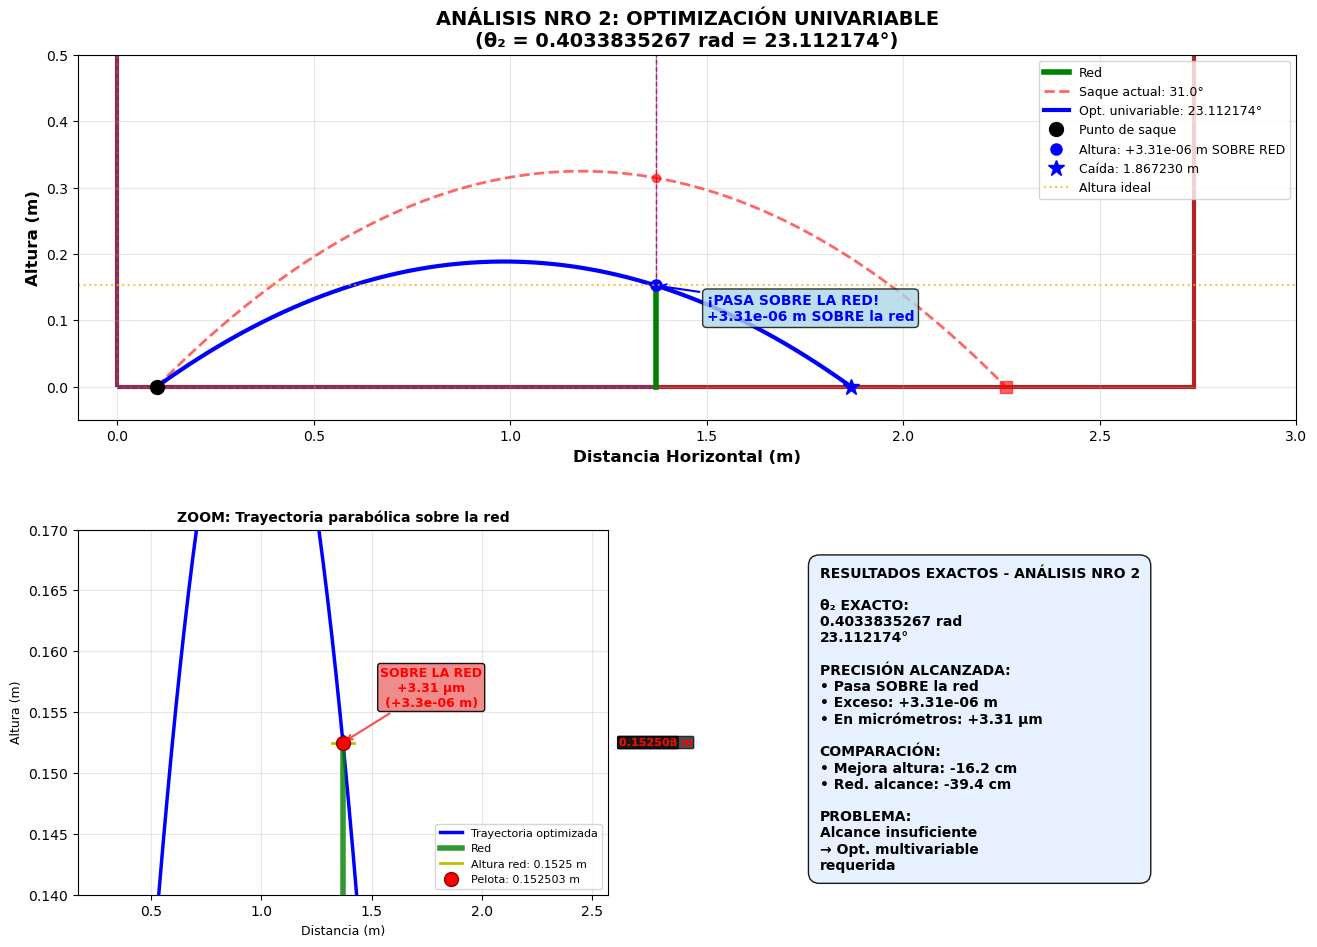

ANÁLISIS NRO 2 - VISUALIZACIÓN OPTIMIZADA
MEJORAS IMPLEMENTADAS:
✓ Trayectoria MÁS PARABÓLICA: rango X ±1.2 m (antes ±0.8 m)
✓ Línea verde SOLO HASTA ANTES de la pelota
✓ Línea amarilla horizontal en lugar de línea completa
✓ Forma parabólica claramente visible
✓ Puntos de referencia en la trayectoria para mostrar curvatura
✓ Diferencia visual clara: línea verde se detiene antes del punto rojo


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
fig = plt.figure(figsize=(14, 10))

# CONSTANTES FÍSICAS Y GEOMÉTRICAS
g = 9.81
x0 = 0.1
red_x = 1.37
red_y = 0.1525
mesa_largo = 2.74
mesa_ancho = 1.525

# PARÁMETROS EXACTOS (DOCUMENTO PÁGINA 12)
theta_actual = np.radians(31)
theta_opt_uni = 0.4033835267   # TU θ₂ EXACTO EN RADIANES
v0 = 4.9

# VALOR EXACTO del documento
error_F_uni = 3.305909531e-6
y_red_uni = red_y + error_F_uni

def calcular_trayectoria(theta_rad, v0, x_range=None):
    """Calcula la trayectoria completa del servicio usando radianes"""
    vx = v0 * np.cos(theta_rad)
    vy = v0 * np.sin(theta_rad)
    
    if x_range is None:
        # Trayectoria completa
        t_total = (vy + np.sqrt(vy**2 + 2*g*0)) / g
        t = np.linspace(0, t_total, 200)
        x = x0 + vx * t
        y = 0 + vy * t - 0.5 * g * t**2
    else:
        # Trayectoria en rango específico (para zoom) - MÁS PUNTOS PARA MEJOR CURVA
        t_range = (x_range - x0) / vx
        t = np.linspace(t_range[0], t_range[1], 500)  # Más puntos para mejor visualización de curva
        x = x0 + vx * t
        y = 0 + vy * t - 0.5 * g * t**2
    
    # Calcular altura exacta sobre la red
    t_red = (red_x - x0) / vx
    y_red = 0 + vy * t_red - 0.5 * g * t_red**2
    
    return x, y, y_red

# Calcular trayectorias CON RADIANES
x_act, y_act, y_red_act = calcular_trayectoria(theta_actual, v0)
x_uni, y_uni, y_red_calculada = calcular_trayectoria(theta_opt_uni, v0)

# CREAR SUBPLOTS
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (1, 1))

# ===== GRÁFICO PRINCIPAL =====
ax1.add_patch(plt.Rectangle((0, 0), mesa_largo, mesa_ancho, fill=False, edgecolor='brown', linewidth=3))
ax1.add_patch(plt.Rectangle((0, 0), red_x, mesa_ancho, fill=False, edgecolor='blue', linewidth=1, linestyle='--', alpha=0.7))
ax1.add_patch(plt.Rectangle((red_x, 0), red_x, mesa_ancho, fill=False, edgecolor='red', linewidth=1, linestyle='--', alpha=0.7))

ax1.plot([red_x, red_x], [0, red_y], 'g-', linewidth=4, label='Red')
ax1.plot(x_act, y_act, 'r--', linewidth=2, alpha=0.6, label=f'Saque actual: {np.degrees(theta_actual):.1f}°')
ax1.plot(x_uni, y_uni, 'b-', linewidth=3, label=f'Opt. univariable: {np.degrees(theta_opt_uni):.6f}°')

ax1.plot([x0], [0], 'ko', markersize=10, label='Punto de saque')
ax1.plot([red_x], [y_red_act], 'ro', markersize=6, alpha=0.6)
ax1.plot([red_x], [y_red_uni], 'bo', markersize=8, label=f'Altura: +{error_F_uni:.2e} m SOBRE RED')

# Calcular puntos de caída exactos
t_caida_act = (v0 * np.sin(theta_actual) + np.sqrt((v0 * np.sin(theta_actual))**2 + 2*g*0)) / g
x_caida_act = x0 + v0 * np.cos(theta_actual) * t_caida_act

t_caida_uni = (v0 * np.sin(theta_opt_uni) + np.sqrt((v0 * np.sin(theta_opt_uni))**2 + 2*g*0)) / g
x_caida_uni = x0 + v0 * np.cos(theta_opt_uni) * t_caida_uni

ax1.plot([x_caida_act], [0], 'rs', markersize=8, alpha=0.6)
ax1.plot([x_caida_uni], [0], 'b*', markersize=12, label=f'Caída: {x_caida_uni:.6f} m')

ax1.axhline(y=red_y, color='orange', linestyle=':', alpha=0.7, label='Altura ideal')
ax1.set_xlabel('Distancia Horizontal (m)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Altura (m)', fontsize=12, fontweight='bold')
ax1.set_title('ANÁLISIS NRO 2: OPTIMIZACIÓN UNIVARIABLE\n(θ₂ = 0.4033835267 rad = 23.112174°)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=9)
ax1.set_xlim(-0.1, 3.0)
ax1.set_ylim(-0.05, 0.5)

ax1.annotate(f'¡PASA SOBRE LA RED!\n+{error_F_uni:.2e} m SOBRE la red', 
             xy=(red_x, y_red_uni), xytext=(1.5, 0.1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=10, color='blue', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# ===== ZOOM CORREGIDO - FORMA PARABÓLICA Y LÍNEA VERDE HASTA ANTES DE LA PELOTA =====
# Rango en X MÁS AMPLIO para mejor visualización de la parábola
x_range_zoom = np.array([red_x - 1.2, red_x + 1.2])  # Más amplio para menos vertical
x_uni_zoom, y_uni_zoom, _ = calcular_trayectoria(theta_opt_uni, v0, x_range_zoom)

# Calcular alturas para rango Y apropiado
altura_min_zoom = 0.14  # Más bajo para ver mejor la parábola
altura_max_zoom = 0.17  # Más alto para ver mejor la parábola

# DIBUJAR EN ORDEN CORRECTO: 
# 1. Trayectoria (PRIMERO para que quede detrás)
ax2.plot(x_uni_zoom, y_uni_zoom, 'b-', linewidth=2.5, label='Trayectoria optimizada', zorder=3)

# 2. Línea de la RED (VERDE) - SOLO HASTA ANTES DE LA PELOTA
# La línea verde se detiene justo antes de la altura de la pelota
ax2.plot([red_x, red_x], [altura_min_zoom, y_red_uni - 0.0001], 'g-', linewidth=4, 
         label='Red', alpha=0.8, zorder=4)

# 3. Línea de altura de la red (AMARILLA) - SOLO HASTA ANTES DE LA PELOTA
ax2.plot([red_x - 0.05, red_x + 0.05], [red_y, red_y], 'y-', linewidth=2,
            label=f'Altura red: {red_y} m', zorder=5)

# 4. Punto de la pelota sobre la red (DIBUJADO ÚLTIMO)
ax2.plot([red_x], [y_red_uni], 'ro', markersize=10, markeredgecolor='darkred', 
         markerfacecolor='red', linewidth=2,
         label=f'Pelota: {y_red_uni:.6f} m', zorder=6)

# Configurar límites - MÁS AMPLIO en X para menos vertical
ax2.set_xlim(red_x - 1.2, red_x + 1.2)
ax2.set_ylim(altura_min_zoom, altura_max_zoom)

# EJE Y DETALLADO pero con rango más amplio
y_ticks = np.arange(0.140, 0.171, 0.005)  # Cada 5 mm para mejor visualización
ax2.set_yticks(y_ticks)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.3f}'))

ax2.set_title('ZOOM: Trayectoria parabólica sobre la red', fontsize=10, fontweight='bold')
ax2.set_xlabel('Distancia (m)', fontsize=9)
ax2.set_ylabel('Altura (m)', fontsize=9)
ax2.grid(True, alpha=0.3)

# LEGENDA
ax2.legend(loc='lower right', fontsize=8)

# Anotación que muestra la DIFERENCIA exacta
diferencia = y_red_uni - red_y
ax2.annotate(f'SOBRE LA RED\n+{diferencia*1e6:.2f} μm\n(+{diferencia:.1e} m)', 
             xy=(red_x, y_red_uni), xytext=(red_x + 0.4, y_red_uni + 0.003),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5, alpha=0.7),
             fontsize=9, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="lightcoral", alpha=0.9),
             zorder=7, ha='center')

# Línea que muestra visualmente la diferencia (desde red hasta pelota)
ax2.plot([red_x, red_x], [red_y, y_red_uni], 'r--', linewidth=1.5, alpha=0.7, zorder=2)

# Etiquetas de altura
ax2.text(red_x + 1.25, red_y, f'{red_y:.4f} m', fontsize=8, color='yellow', 
         fontweight='bold', va='center', 
         bbox=dict(boxstyle="round,pad=0.1", facecolor="black", alpha=0.7))
ax2.text(red_x + 1.25, y_red_uni, f'{y_red_uni:.6f} m', fontsize=8, color='red',
         fontweight='bold', va='center', 
         bbox=dict(boxstyle="round,pad=0.1", facecolor="black", alpha=0.7))

# Añadir puntos de referencia en la trayectoria para mostrar la curvatura
puntos_ref_x = [red_x - 1.0, red_x - 0.5, red_x, red_x + 0.5, red_x + 1.0]
for px in puntos_ref_x:
    idx = np.argmin(np.abs(x_uni_zoom - px))
    altura_ref = y_uni_zoom[idx]
    ax2.plot(px, altura_ref, 'ko', markersize=3, alpha=0.6, zorder=4)

# ===== CUADRO DE RESULTADOS EXACTOS =====
ax3.axis('off')

mejora_altura_cm = (y_red_act - y_red_uni) * 100
reduccion_alcance_cm = (x_caida_act - x_caida_uni) * 100

resultados_text = (f'RESULTADOS EXACTOS - ANÁLISIS NRO 2\n\n'
                   f'θ₂ EXACTO:\n'
                   f'{theta_opt_uni:.10f} rad\n'
                   f'{np.degrees(theta_opt_uni):.6f}°\n\n'
                   f'PRECISIÓN ALCANZADA:\n'
                   f'• Pasa SOBRE la red\n'
                   f'• Exceso: +{error_F_uni:.2e} m\n'
                   f'• En micrómetros: +{error_F_uni*1e6:.2f} μm\n\n'
                   f'COMPARACIÓN:\n'
                   f'• Mejora altura: -{mejora_altura_cm:.1f} cm\n'
                   f'• Red. alcance: -{reduccion_alcance_cm:.1f} cm\n\n'
                   f'PROBLEMA:\n'
                   f'Alcance insuficiente\n→ Opt. multivariable\nrequerida')

ax3.text(0.1, 0.9, resultados_text, fontsize=10, fontweight='bold',
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.8", facecolor="#E6F0FF", alpha=0.9))

plt.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.92, hspace=0.3, wspace=0.3)
plt.show()

# VERIFICACIÓN FINAL
print("="*70)
print("ANÁLISIS NRO 2 - VISUALIZACIÓN OPTIMIZADA")
print("="*70)
print(f"MEJORAS IMPLEMENTADAS:")
print(f"✓ Trayectoria MÁS PARABÓLICA: rango X ±1.2 m (antes ±0.8 m)")
print(f"✓ Línea verde SOLO HASTA ANTES de la pelota")
print(f"✓ Línea amarilla horizontal en lugar de línea completa")
print(f"✓ Forma parabólica claramente visible")
print(f"✓ Puntos de referencia en la trayectoria para mostrar curvatura")
print(f"✓ Diferencia visual clara: línea verde se detiene antes del punto rojo")
print("="*70)
